In [21]:
from IPython.display import Image

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/marcsoler/Documents/GitHub/Ironhack_lab_work/Case Studies/Week 1/H4A/data/H4A_data_clean.csv')

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

## Distribution - types and tips

##### when data is continuous we can visually analyse the spread, as well as relationships between variables, to learn lessons about the sample data and the population it ultimately represents

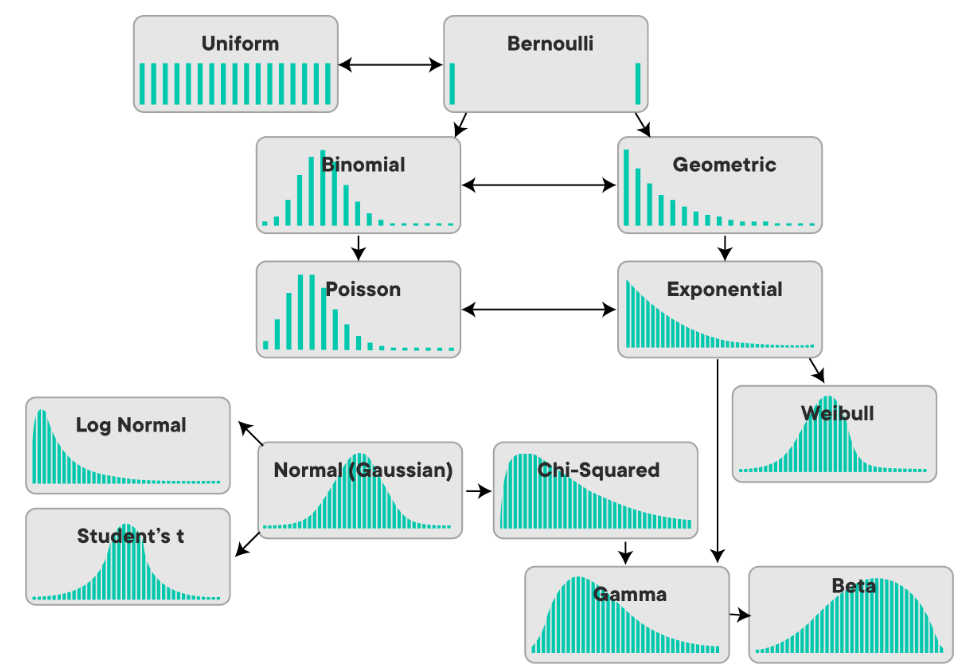

In [22]:
Image("diff distributions.png")

#### Histograms 

A histogram provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right. In addition, if it is unimodal, bimodal or multimodal. It can also show any outliers or gaps in the data. In brief, a histogram summarizes the distribution properties of a continuous numerical variable.

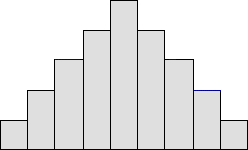

In [23]:
Image("normal.gif") # the normal or gaussian distribution

Rules:
* symmetric bell shape.
* mean and median are equal; both located at the center of the distribution.
* approx 68% percent of the data falls within 1 standard deviation of the mean.
* (hint for next week - machine learning algorithms love Gaussian)

In [ ]:
#Can you think of an example of such a distribution in the real world?


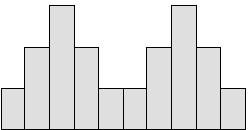

In [24]:
Image("bimodal.gif")

Rules: 

* two visible peaks
* may indicate two systems or sources of data
* recommended to split the two peaks out and deal with them separately 
* this can be handled during data wrangling 

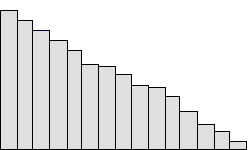

In [25]:
Image("skew-right.gif")

A distribution skewed to the right is said to be positively skewed.

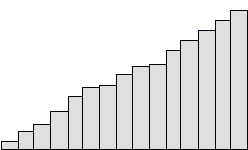

In [26]:
Image("skew-left.gif")

A distribution skewed to the left is said to be negatively skewed

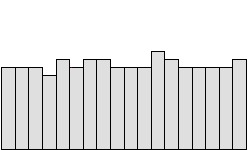

In [27]:
Image("uniform.gif")

A uniform distribution, as shown below, provides little information.
It may describe a distribution which has several modes (peaks). 
If your histogram has this shape, check to see if several sources of variation have been combined. If so, analyze them separately. If multiple sources of variation do not seem to be the cause of this pattern, different groupings can be tried to see if a more useful pattern results. 

In [ ]:
#Can you think of an example of such a distribution in the real world?


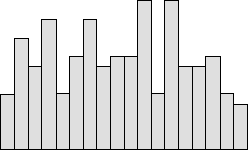

In [28]:
Image("random.gif")

This type has no apparent pattern.  Like the uniform distribution, it may describe a distribution that has several modes (peaks), hiding several combined sources of variation or would benefit from groupings.

Lets download some penguin data from [here](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)

In [34]:
#create a sub data frame of the numeric variables "dfnum"
#that you want to analyse next to eachother
data_num = data._get_numeric_data()
data_num.info()
data2 = data[['medianhv', 'ic1', 'ic2', 'ic3', 'ic4', 'percapita', 'hvp1', 'avggift', 'target_d']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   controln   3993 non-null   int64  
 1   medianhv   3993 non-null   float64
 2   ic1        3993 non-null   int64  
 3   ic4        3993 non-null   float64
 4   hvp1       3993 non-null   int64  
 5   percapita  3993 non-null   float64
 6   pobc1      3993 non-null   int64  
 7   pobc2      3993 non-null   int64  
 8   ic2        3993 non-null   float64
 9   ic3        3993 non-null   int64  
 10  avggift    3993 non-null   float64
 11  tcode      3993 non-null   int64  
 12  dob        3993 non-null   int64  
 13  target_d   3993 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 436.9 KB


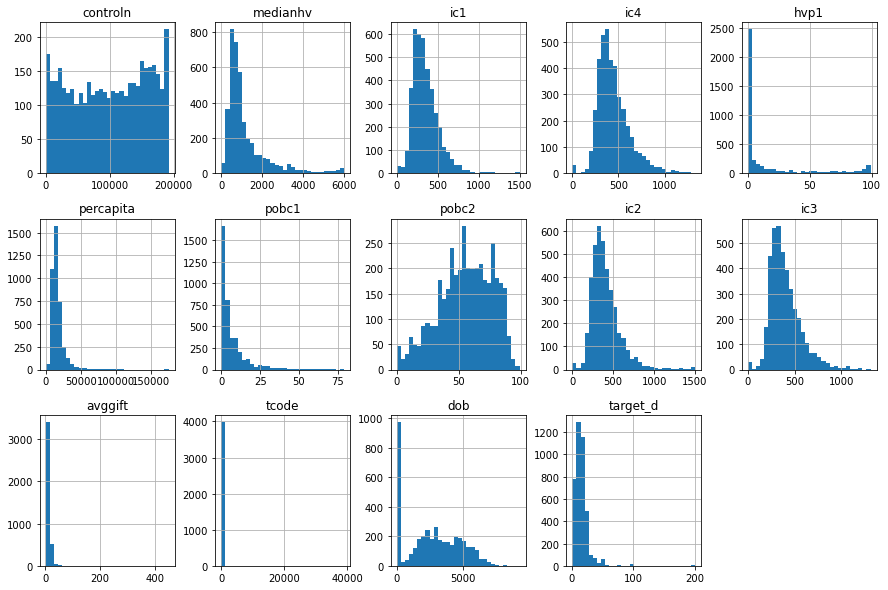

In [21]:
#create all histograms 
data_num.hist(bins=30, figsize=(15, 10), layout=(3, 5));

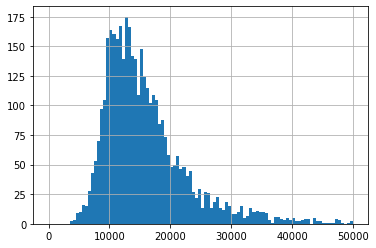

In [24]:
data['percapita'].hist(range=(1,50000), bins=100);

TASK : summarise in bullet points what type of distribution we see for each variable and what we can interpret from them:

* avggift: in our sample, we can see that most donors give less than $50. We have potential outliers up to $400. (the distribution is heavily skewed to the right).
* mismatch between expected donation and historical donations.
* medianhv: there's some variation in household value neighbourhoods - some expensive ones, the majority are similar, less than 200k med household value.
* consistency in distribution between ic1, 2, 3 and 4. Fairly normal and skewed to the right. theyre also very similar as constructs.
* per capita income, there are outliers, but otherwise seems normal.

###  in pairs challenge - analyse the spread of fields in an unknown data set, following the same process

- try to pick a data set with at least 3 numerical columns 

places to get (clean,easy to use) data;

* data world
* kaggle 
* london data store
* ... there are others

### Scatter plots 

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

Identification of correlational relationships are common with scatter plots. In these cases, we want to know, if we were given a particular horizontal value, what a good prediction would be for the vertical value. You will often see the variable on the horizontal axis denoted an independent variable, and the variable on the vertical axis the dependent variable. Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.

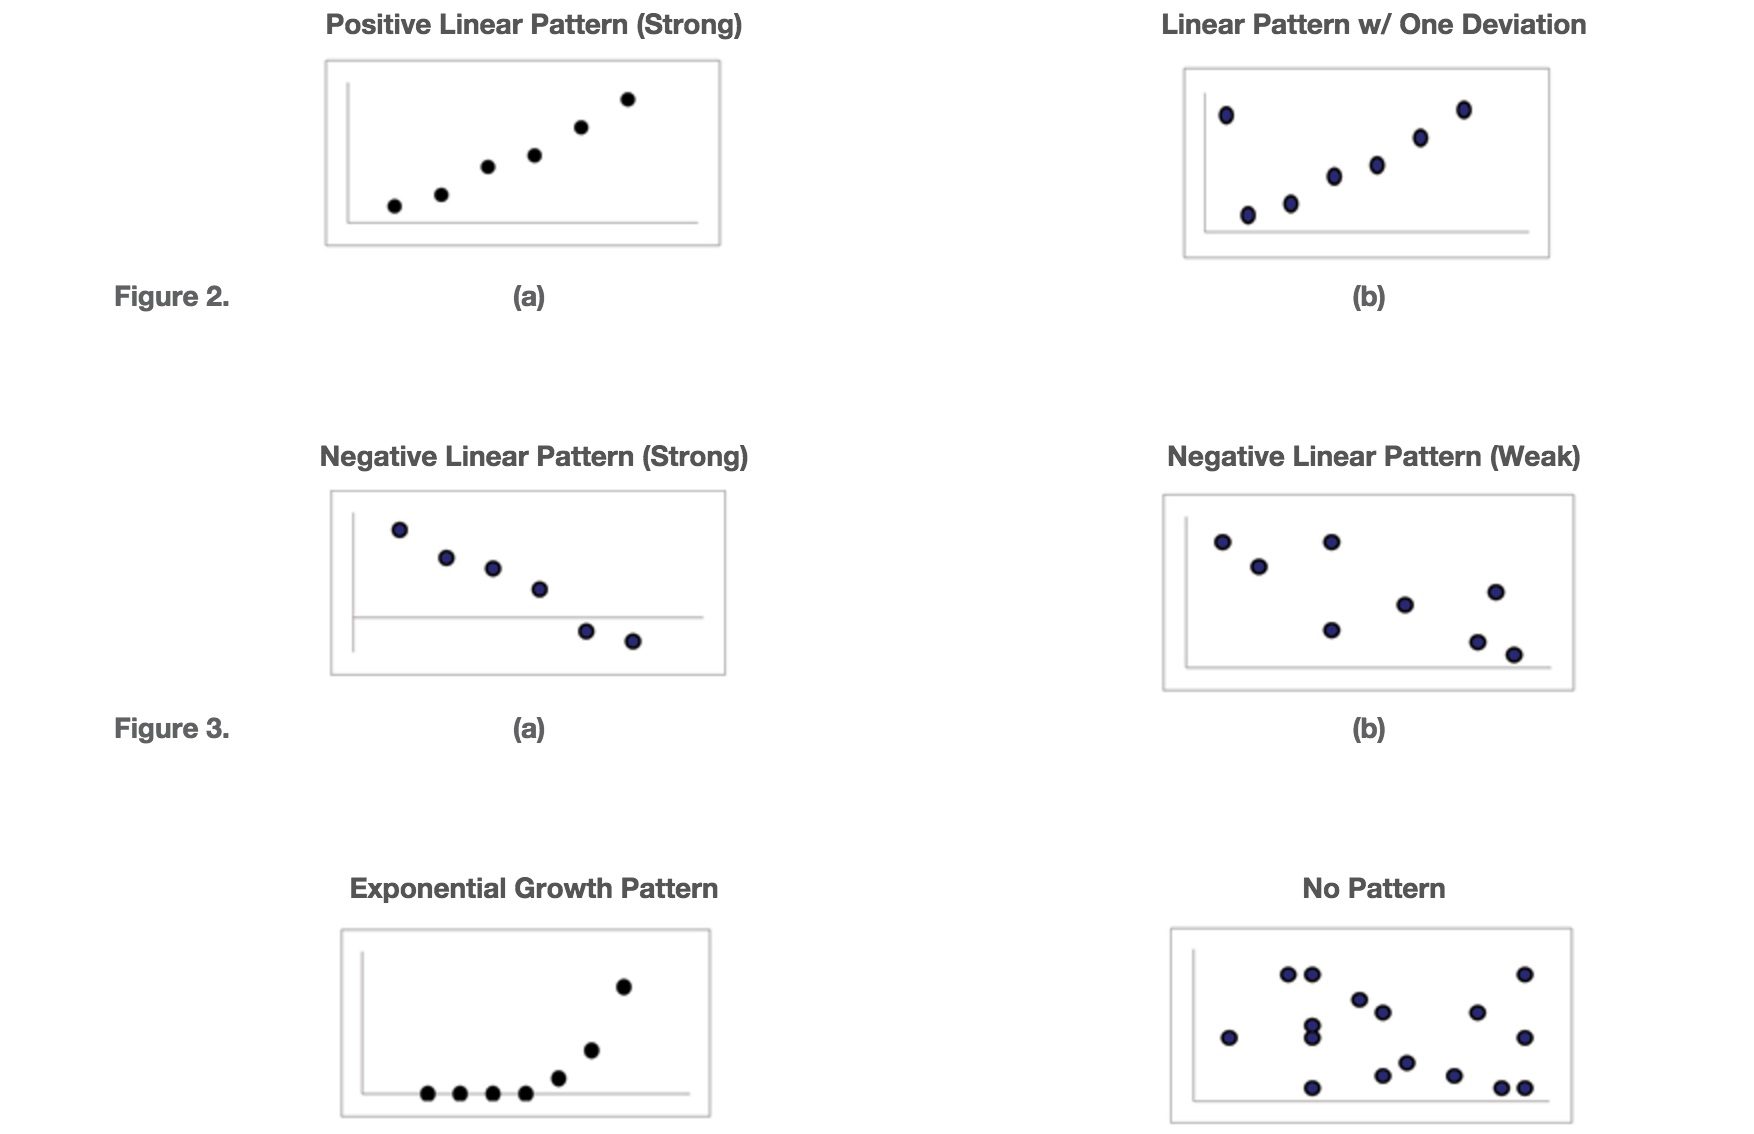

In [29]:
Image("scatter.png")

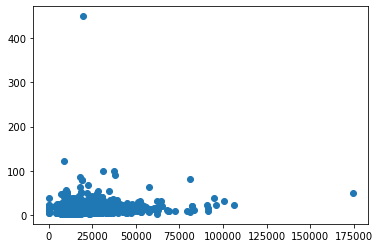

In [29]:
plt.scatter(x=data['percapita'], y=data['avggift']);

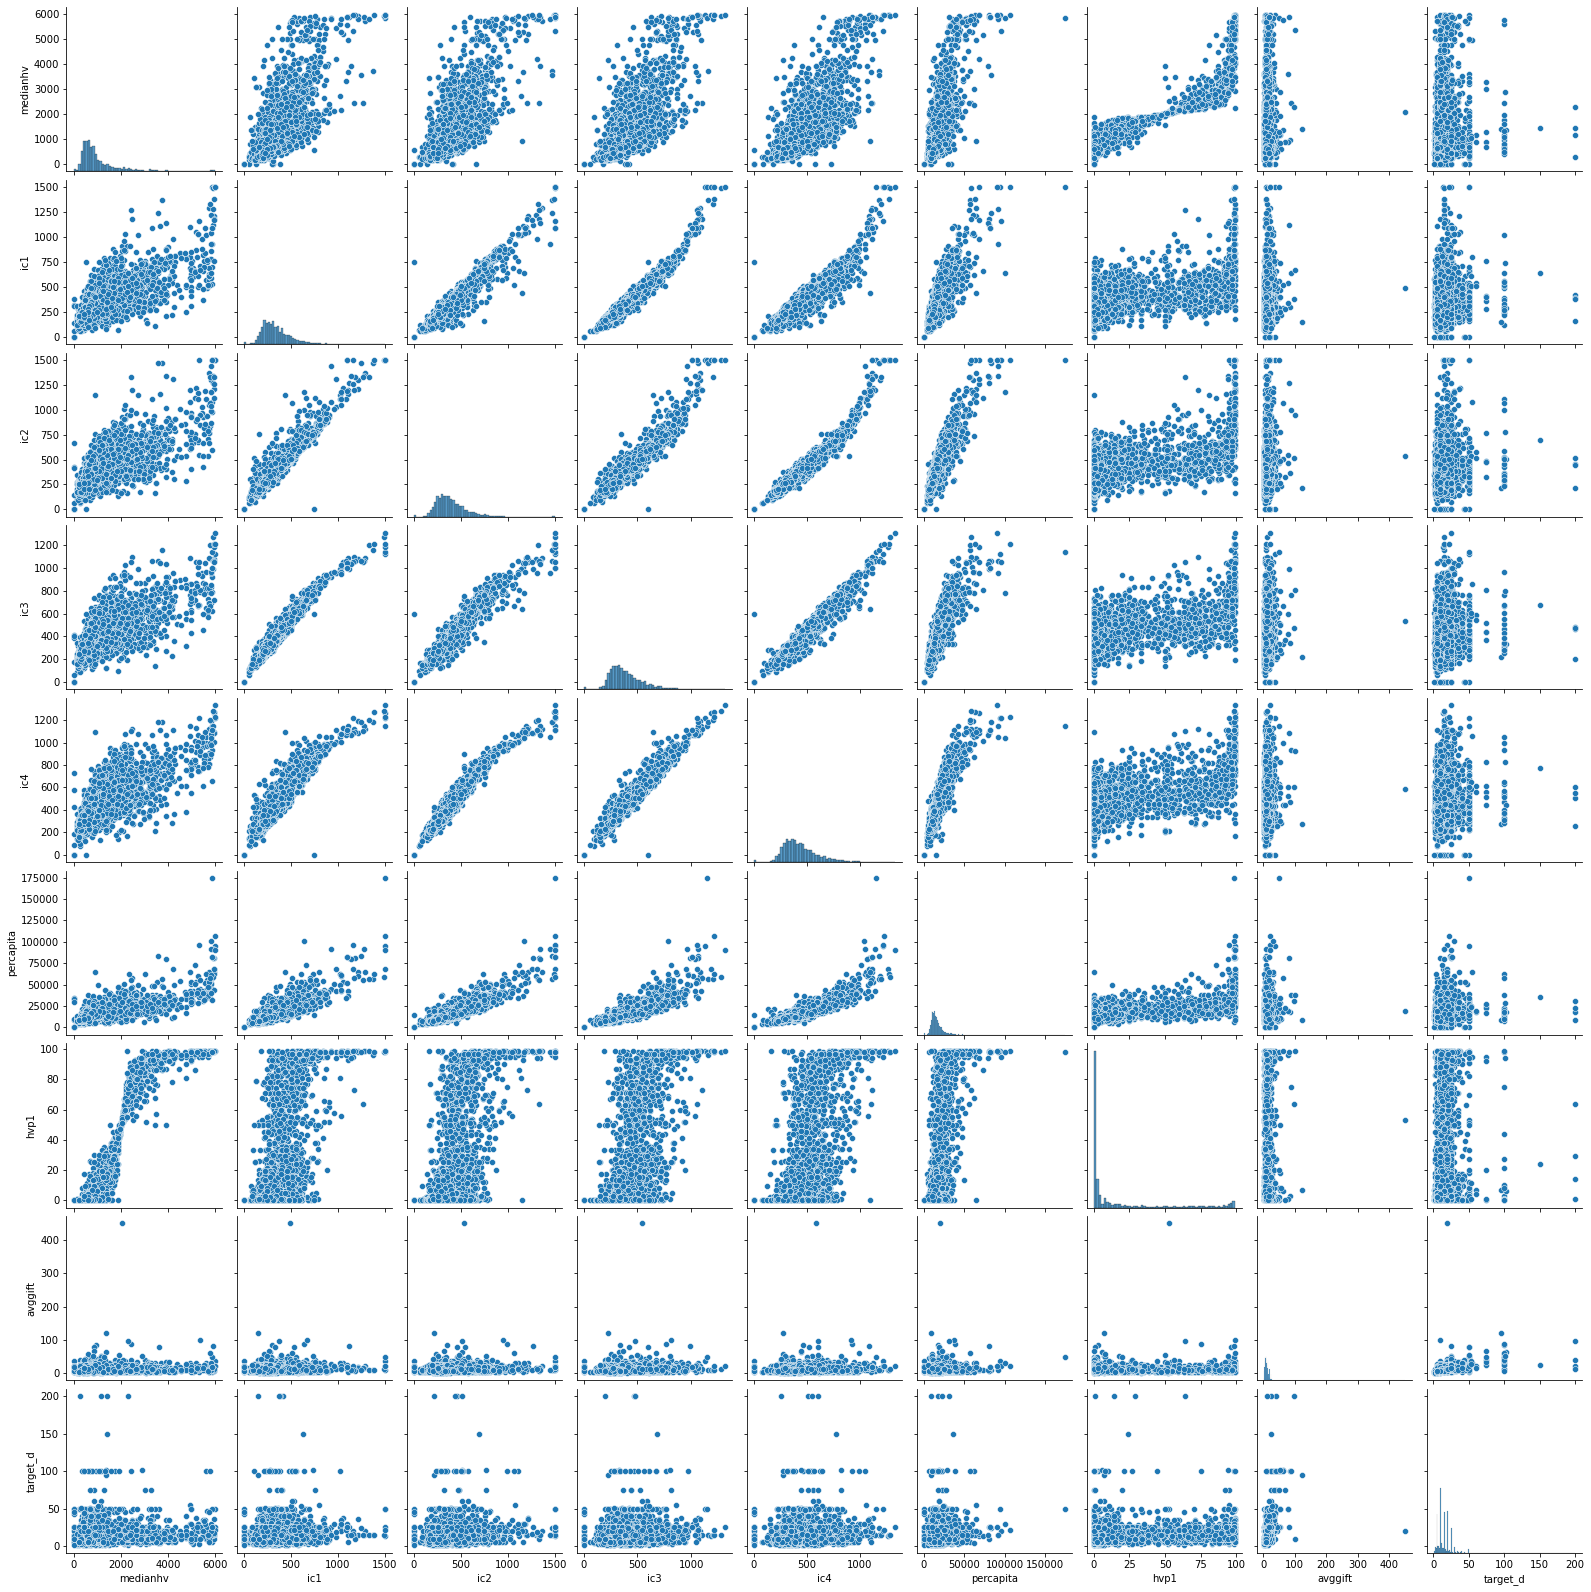

In [35]:
# all scatter plots as a matrix using pairplot
sns.pairplot(data2);

TASK summarise in bullet points what important relationships you observe see and what you can interpret/infer from them:

* All ic variables have a positive relationship between them. They're highly correlated.
* medianhv seems to positively correlate with all ic variables (lots of dispersion), percapita and hvp1 (sigmoid).
* percapita seems to slightly and positively correlate with the ic variables and the medianhv.
* hvp1 has a positive association with the medianhv.
* avggift doesn't seem to correlate with any other variable.
* Flags for business case: the important stuff: avggift not correlating, less correl than expected between target_d and the financial demographic variables.


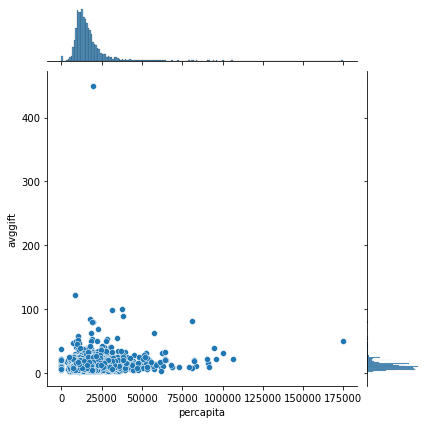

In [36]:
#focusing on one relationship - you could also use different visual methods 
# example jointplot 
sns.jointplot(data=data, y='avggift', x='percapita');

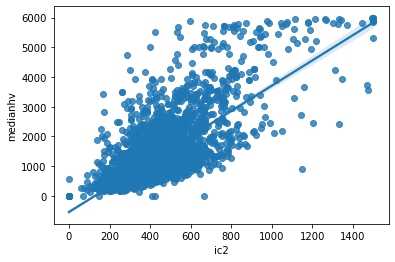

In [37]:
#if you think there is a correlation, plot a trend line with the scatter 
# example regplot 

sns.regplot(data=data, x='ic2', y='medianhv');

### Quick health warning on scatter plots - correlation v causation 

This is not so much an issue with creating a scatter plot as it is an issue with its interpretation. 

Simply because we observe a relationship between two variables in a scatter plot, it does not mean that changes in one variable are responsible for changes in the other. This gives rise to the common phrase in statistics that correlation does not imply causation. 

It is possible that the observed relationship is driven by some third variable that affects both of the plotted variables, that the causal link is reversed, or that the pattern is simply coincidental.

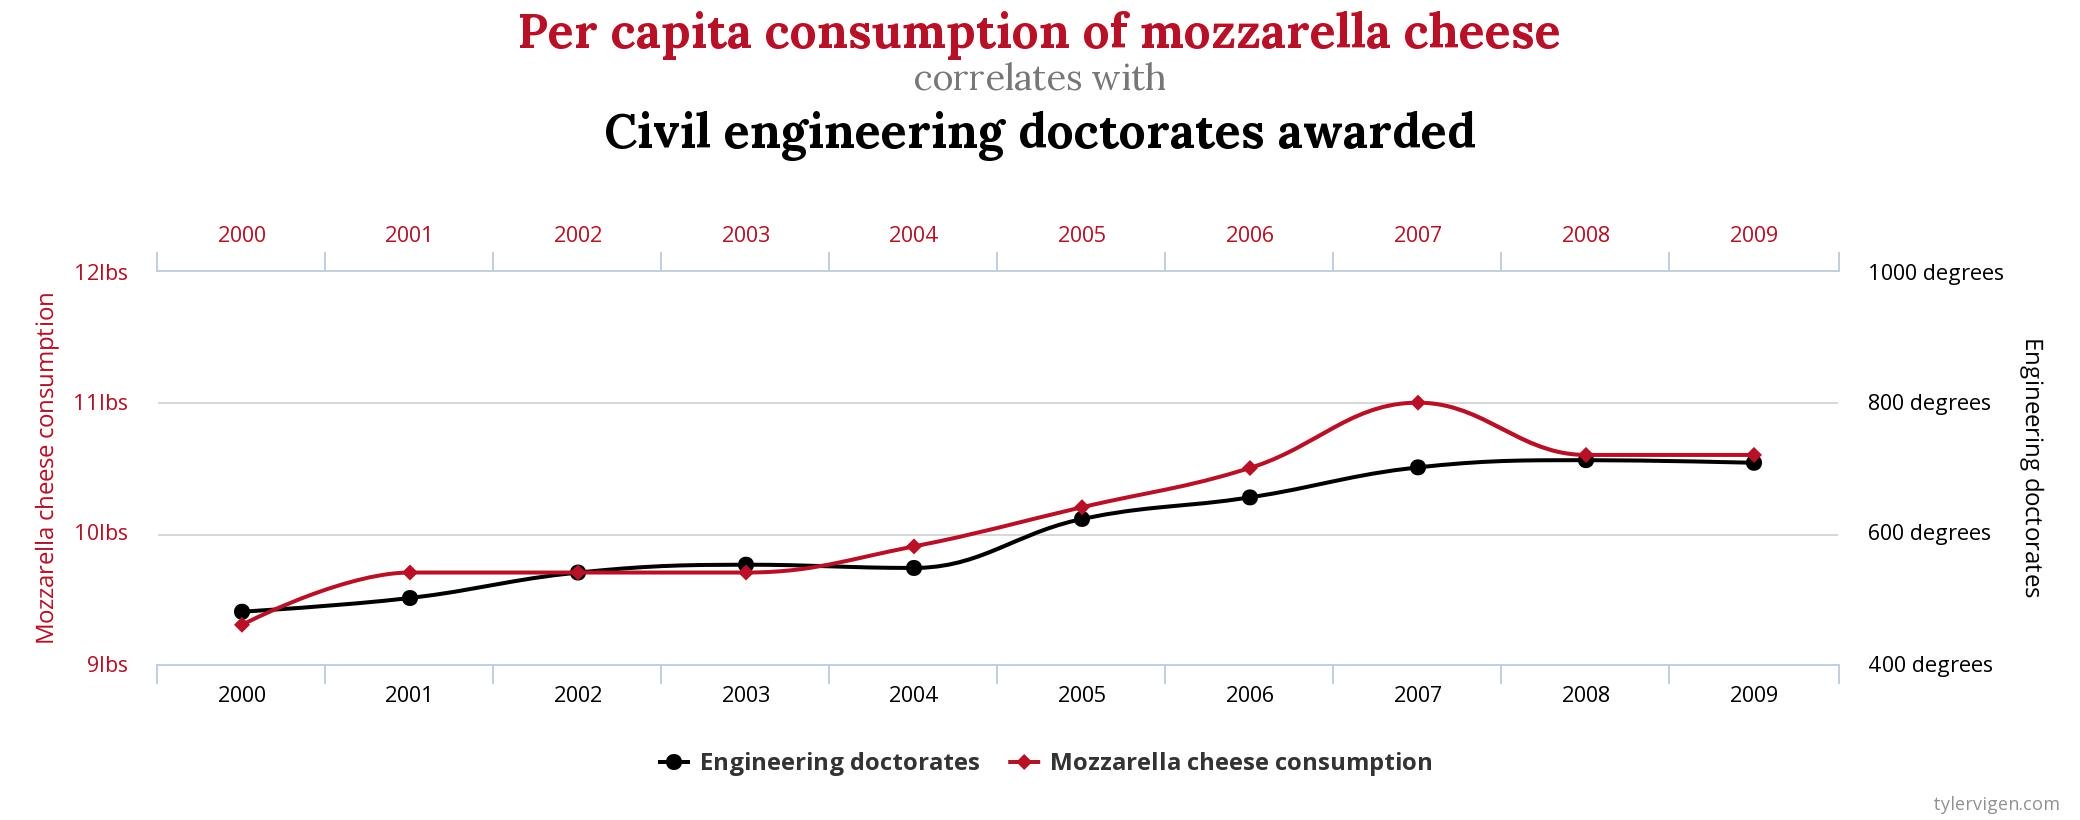

In [30]:
Image("cheese.jpeg")

## Correlation - the very awesome correlation matrix

In [60]:
#create a correlation matrix of numerical columns
datat = data.drop(['controln'], axis=1)
correlations_matrix = datat.corr()
correlations_matrix

,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
medianhv,1.000000,0.707294,0.748796,0.925311,0.745060,0.428054,-0.297028,0.743474,0.734518,0.138708,-0.011540,0.008388,0.116100
ic1,0.707294,1.000000,0.928980,0.611130,0.805221,0.166679,-0.149827,0.951409,0.974777,0.120445,-0.017006,0.118953,0.113246
ic4,0.748796,0.928980,1.000000,0.656722,0.868411,0.179921,-0.187705,0.971498,0.971909,0.132438,-0.025647,0.092771,0.131260
hvp1,0.925311,0.611130,0.656722,1.000000,0.628112,0.425179,-0.261382,0.637033,0.647854,0.128421,-0.009266,-0.008223,0.105403
percapita,0.745060,0.805221,0.868411,0.628112,1.000000,0.165962,-0.248560,0.874783,0.827514,0.141580,-0.021470,0.030901,0.137878
pobc1,0.428054,0.166679,0.179921,0.425179,0.165962,1.000000,-0.389898,0.167252,0.186805,0.068566,-0.009035,0.013852,0.039213
pobc2,-0.297028,-0.149827,-0.187705,-0.261382,-0.248560,-0.389898,1.000000,-0.162544,-0.177626,-0.075167,0.029770,0.023941,-0.072345
ic2,0.743474,0.951409,0.971498,0.637033,0.874783,0.167252,-0.162544,1.000000,0.953585,0.136096,-0.018394,0.099745,0.129964
ic3,0.734518,0.974777,0.971909,0.647854,0.827514,0.186805,-0.177626,0.953585,1.000000,0.125438,-0.023239,0.111290,0.121965
avggift,0.138708,0.120445,0.132438,0.128421,0.141580,0.068566,-0.075167,0.136096,0.125438,1.000000,-0.009504,0.014235,0.487595


<AxesSubplot:>

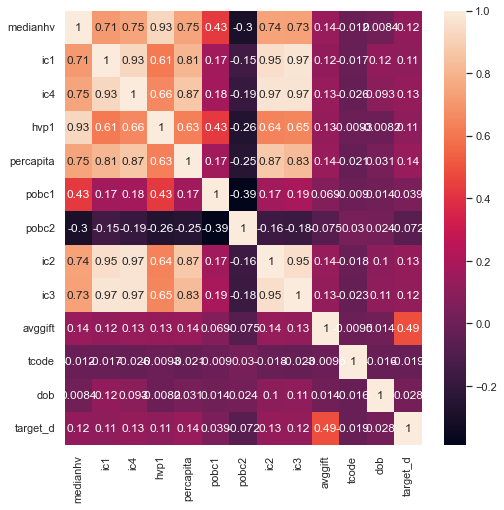

In [61]:
#create a heatmap to visually interrogate the relationships 
sns.heatmap(correlations_matrix, annot =True)

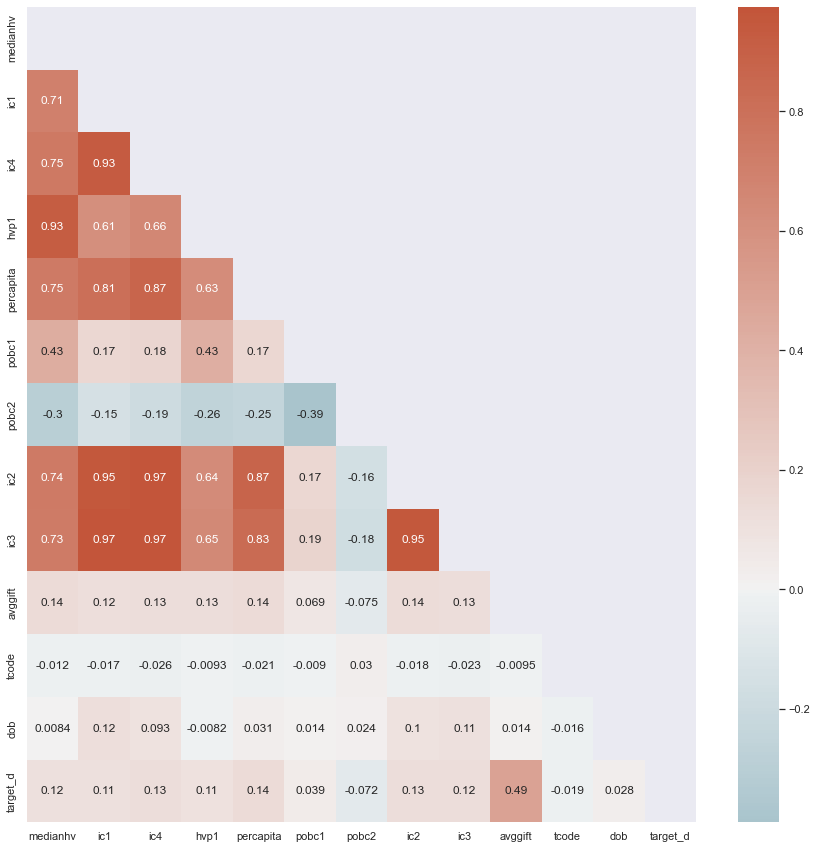

In [66]:
mask=np.zeros_like(correlations_matrix) # this numpy mask eliminates the repeated correlations in the matrix.
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(correlations_matrix, mask=mask, annot=True, center=0, 
               cmap=sns.diverging_palette(220, 20, as_cmap=True)); #since there are negative correlations, 

### What is Multicollinearity and when is it a problem? 

Multicollinearity occurs when independent variables in a regression model are highly correlated. 

This correlation is a problem because independent variables should be independent. 

If the degree of correlation between variables is high enough, it can cause problems when you fit a machine learning model and interpret the results.

example - if I was trying to predict the number of bikes that would be rented in berlin by a sample of students, having other columns in my dataset "loves cycling" and "has no bike" and "normally rents a bike" would certainly have strong multicollinearity and wouldnt really tell me anything interesting other than those columns are good predictors of bike rental. Its a bit of a so what. 

The interesting thing would be if other factors such as age, fitness, access to a vehicle, location, weather conditions could be used to make predictions. 


## Box plots 

In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

An outlier is an observation that is numerically distant from the rest of the data. Outliers can be identified easily using box plots because outliers are a data point that are visually located outside the whiskers of the box plot.

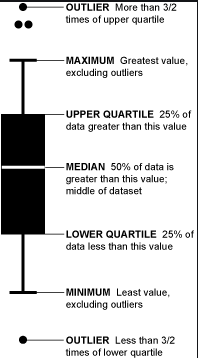

In [31]:
Image('boxplot.png')

<AxesSubplot:>

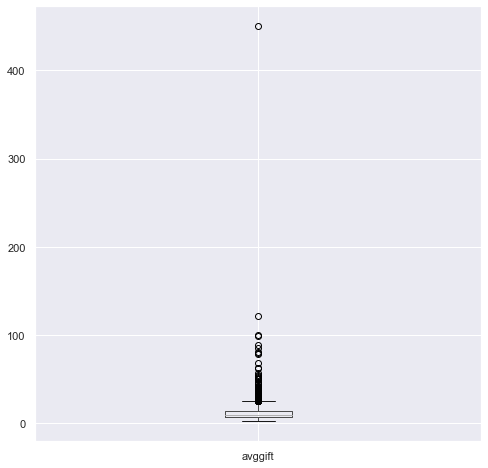

In [67]:
#standard box plot of body mass
data.boxplot('avggift')

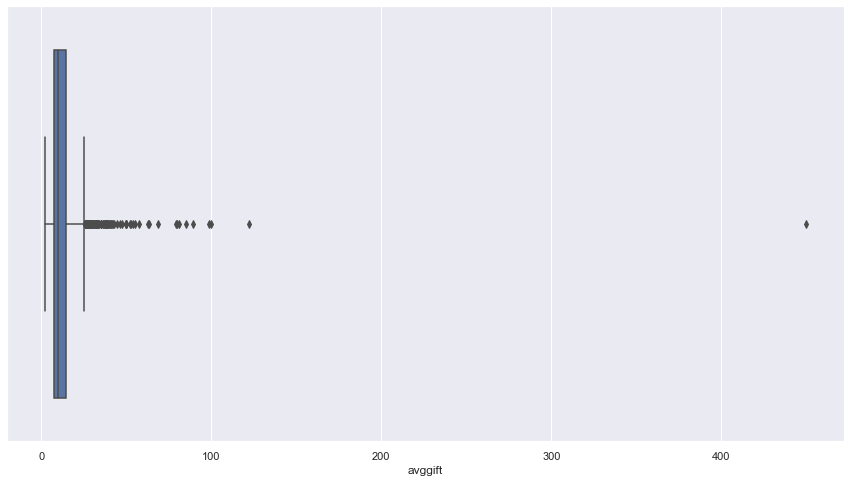

In [72]:
#seaborn horizonal boxplot of body mass- can be easier to read 
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data['avggift'])

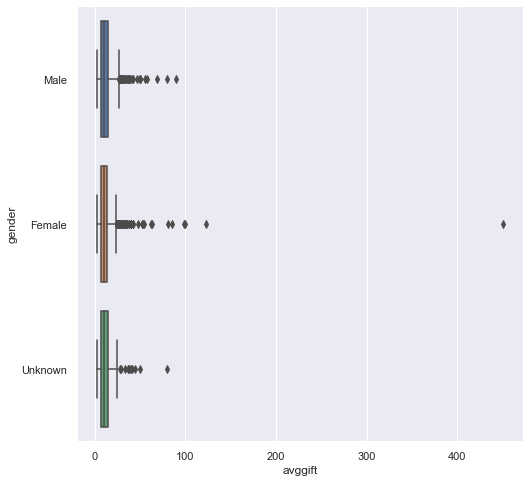

In [74]:
#shorthand to create a boxplot with multiple categories 
sns.boxplot(x='avggift', y='gender', data=data);

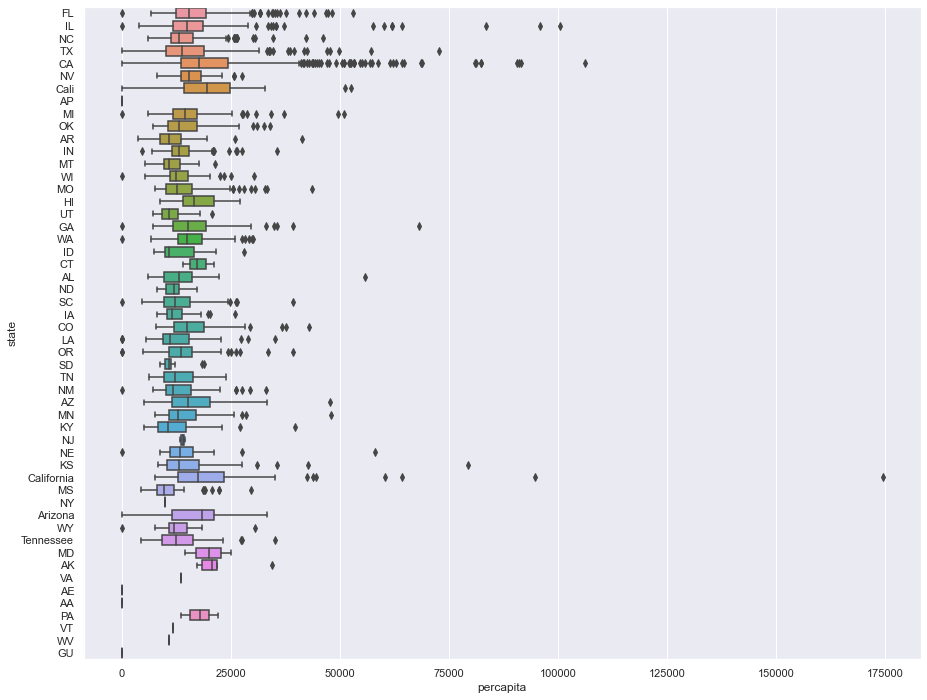

In [82]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.boxplot(x='percapita', y='state', data=data)

TASK- summarise in bullet points what can be seen from the boxplot above:

* The percapita outlier is a female from California
* California's donors have the highest income per capita of all.
* It seems that Missouri has the lowest income per capita.

## Fix state in this data set

In [83]:
def clean_state(x):
    if x in ['Cali', 'CA', 'California']:
        return 'CA'
    elif x == 'Arizona':
        return 'AZ'
    elif x == 'Tennessee':
        return 'TN'
    else:
        return x

In [84]:
data['state']= list(map(clean_state, data['state']))

## Extracting as a CSV

In [85]:
data.to_csv('/Users/marcsoler/Documents/GitHub/Ironhack_lab_work/Case Studies/Week 1/H4A/data/merged_clean_h4a.csv', index=False)